In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
tweets_df = pd.read_csv(r"twitter_train_data.csv", encoding='ISO-8859-1')

In [14]:
tweets_df

id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]

In [16]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [17]:
tweets_df.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

In [18]:
tweets_df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [19]:
tweets_df = tweets_df.drop(['id'], axis=1)

In [20]:
tweets_df

label                                              tweet
0          0   @user when a father is dysfunctional and is s...
1          0  @user @user thanks for #lyft credit i can't us...
2          0                                bihday your majesty
3          0  #model   i love u take with u all the time in ...
4          0             factsguide: society now    #motivation
...      ...                                                ...
31957      0  ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...
31958      0    to see nina turner on the airwaves trying to...
31959      0  listening to sad songs on a monday morning otw...
31960      1  @user #sikh #temple vandalised in in #calgary,...
31961      0                   thank you @user for you follow  

[31962 rows x 2 columns]

## Explore the dataset

<AxesSubplot:>

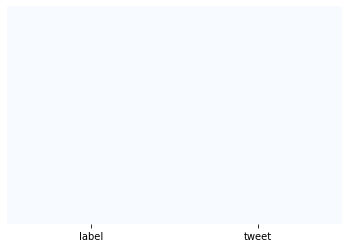

In [21]:
sns.heatmap(tweets_df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

array([[<AxesSubplot:title={'center':'label'}>]], dtype=object)

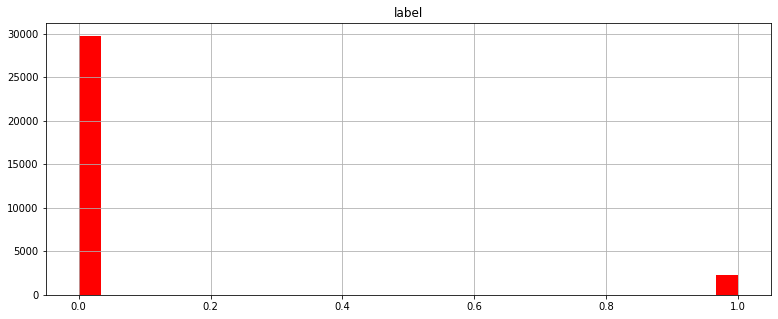

In [22]:
# Histograms
tweets_df.hist(bins=30, figsize=(13,5), color='r')

/Users/ramneet/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

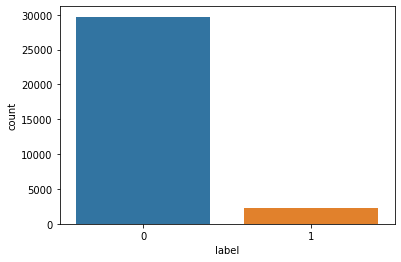

In [23]:
sns.countplot(tweets_df['label'], label='Count')

In [25]:
# Length of the tweets
tweets_df['length'] = tweets_df['tweet'].apply(len)
tweets_df['length']

0        102
1        122
2         21
3        118
4         39
        ... 
31957    110
31958    131
31959     63
31960     67
31961     32
Name: length, Length: 31962, dtype: int64

<AxesSubplot:ylabel='Frequency'>

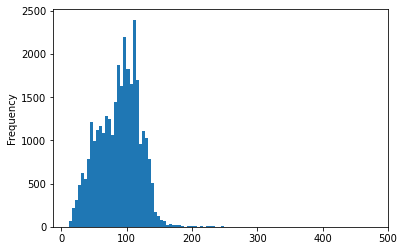

In [26]:
tweets_df['length'].plot(bins=100, kind='hist')

In [27]:
tweets_df.describe()

label        length
count  31962.000000  31962.000000
mean       0.070146     88.039891
std        0.255397     31.863440
min        0.000000     11.000000
25%        0.000000     64.000000
50%        0.000000     92.000000
75%        0.000000    110.000000
max        1.000000    477.000000

In [28]:
# shortest tweet
tweets_df[tweets_df['length'] == 11]['tweet']

25195    i love you 
Name: tweet, dtype: object

In [29]:
# Average tweet
tweets_df[tweets_df['length'] == 88]['tweet']

84       use the power of your mind to #heal your body!...
115       Ã¢ÂÂ #under the spell of brexit referendum ...
141      retweeted lion pro (@user  #tgif #webmareting ...
177      check  @user incredibly   to have made great  ...
284       @user have a magnificent monday! #mondaymorni...
                               ...                        
31099    death is all well and good until the dead one ...
31393    #flagday2016   #flag #day #2016 #(30 #photos) ...
31530    super fun with my best in ideacity #zoomer #to...
31826      #father's day to all the awesome fathers out...
31837    have you seen our latest designs? vote for you...
Name: tweet, Length: 384, dtype: object

In [30]:
# finding the positive tweet
positive = tweets_df[tweets_df['label']==0]
positive

label                                              tweet  length
0          0   @user when a father is dysfunctional and is s...     102
1          0  @user @user thanks for #lyft credit i can't us...     122
2          0                                bihday your majesty      21
3          0  #model   i love u take with u all the time in ...     118
4          0             factsguide: society now    #motivation      39
...      ...                                                ...     ...
31956      0  off fishing tomorrow @user carnt wait first ti...      61
31957      0  ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...     110
31958      0    to see nina turner on the airwaves trying to...     131
31959      0  listening to sad songs on a monday morning otw...      63
31961      0                   thank you @user for you follow        32

[29720 rows x 3 columns]

In [31]:
# finding negative tweets
negative = tweets_df[tweets_df['label']==1]
negative

label                                              tweet  length
13         1  @user #cnn calls #michigan middle school 'buil...      74
14         1  no comment!  in #australia   #opkillingbay #se...     101
17         1                             retweet if you agree!       22
23         1    @user @user lumpy says i am a . prove it lumpy.      47
34         1  it's unbelievable that in the 21st century we'...     104
...      ...                                                ...     ...
31934      1  lady banned from kentucky mall. @user  #jcpenn...      59
31946      1  @user omfg i'm offended! i'm a  mailbox and i'...      82
31947      1  @user @user you don't have the balls to hashta...     112
31948      1   makes you ask yourself, who am i? then am i a...      87
31960      1  @user #sikh #temple vandalised in in #calgary,...      67

[2242 rows x 3 columns]

# Plot the wordcloud
#### converting all tweet to one massive string 

In [32]:
sentences = tweets_df['tweet'].tolist()
sentences

[' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run',
 "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked",
 '  bihday your majesty',
 '#model   i love u take with u all the time in urÃ°Â\x9fÂ\x93Â±!!! Ã°Â\x9fÂ\x98Â\x99Ã°Â\x9fÂ\x98Â\x8eÃ°Â\x9fÂ\x91Â\x84Ã°Â\x9fÂ\x91Â\x85Ã°Â\x9fÂ\x92Â¦Ã°Â\x9fÂ\x92Â¦Ã°Â\x9fÂ\x92Â¦  ',
 ' factsguide: society now    #motivation',
 '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ',
 ' @user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢Â\x80Â¦',
 "the next school year is the year for exams.Ã°Â\x9fÂ\x98Â¯ can't think about that Ã°Â\x9fÂ\x98Â\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl",
 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  Ã¢Â\x80Â¦ ',
 " @user @user welcome here !  i'm   i

In [33]:
len(sentences)

31962

In [34]:
sentences_as_one_string = " ".join(sentences)
sentences_as_one_string

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run @user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked   bihday your majesty #model   i love u take with u all the time in urÃ°Â\x9fÂ\x93Â±!!! Ã°Â\x9fÂ\x98Â\x99Ã°Â\x9fÂ\x98Â\x8eÃ°Â\x9fÂ\x91Â\x84Ã°Â\x9fÂ\x91Â\x85Ã°Â\x9fÂ\x92Â¦Ã°Â\x9fÂ\x92Â¦Ã°Â\x9fÂ\x92Â¦    factsguide: society now    #motivation [2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo    @user camping tomorrow @user @user @user @user @user @user @user dannyÃ¢Â\x80Â¦ the next school year is the year for exams.Ã°Â\x9fÂ\x98Â¯ can\'t think about that Ã°Â\x9fÂ\x98Â\xad #school #exams   #hate #imagine #actorslife #revolutionschool #girl we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  Ã¢Â\x80Â¦   @user @user welcome here !  i\'m   it\'s so #gr8 !   Ã¢Â\x86Â\x9d #ir

In [35]:
!pip install WordCloud
from wordcloud import WordCloud

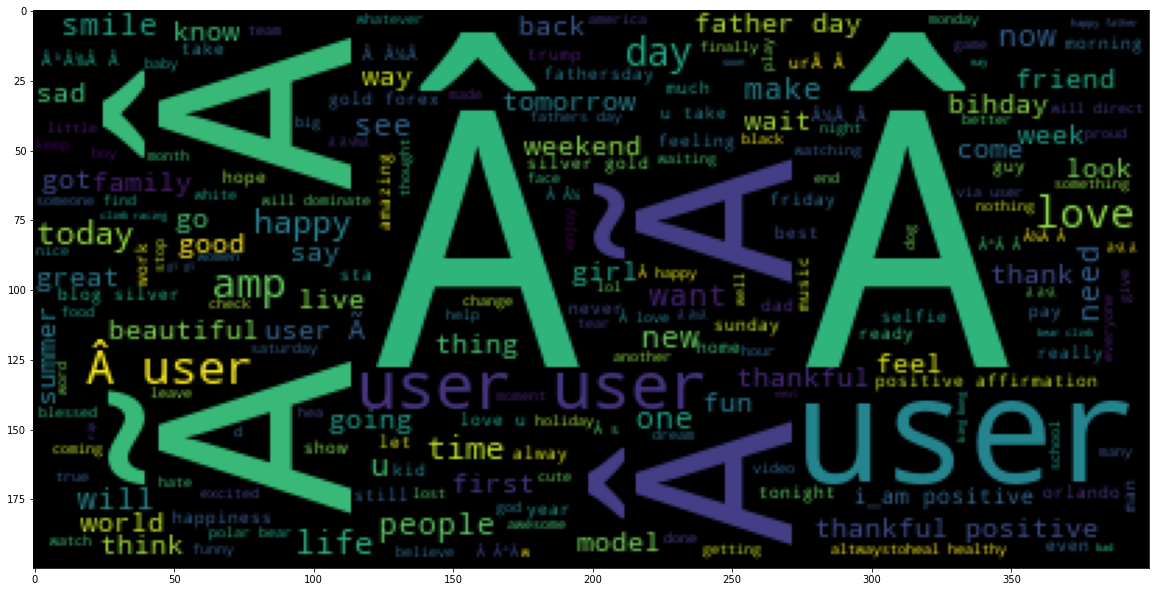

In [36]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

(-0.5, 399.5, 199.5, -0.5)

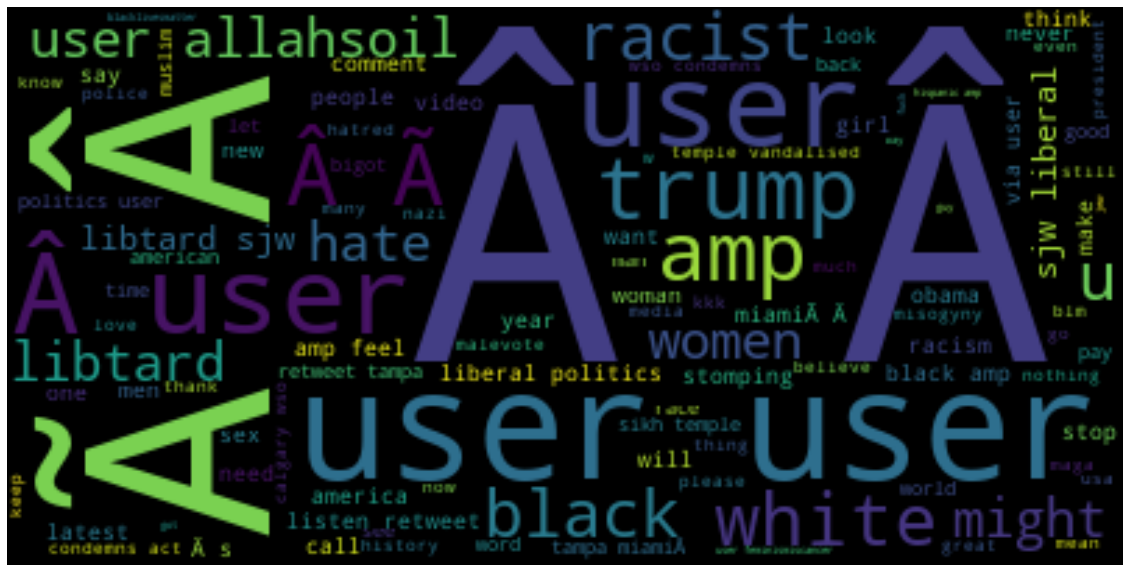

In [46]:
# Plotting the wordcloud of the negative dataframe
negative_list = negative['tweet'].tolist()
negative_sentences_as_one_string = " ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string), interpolation='bilinear')
plt.axis("off")

# Data Cleaning
## Removing stop words

In [37]:
import nltk
import string

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramneet/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
# cleaning up all the messages
# punc short of punctuation
def cleaning_msg(msg):
    punc_removed = [ char for char in msg if char not in string.punctuation ]
    punc_removed_join = ''.join(punc_removed)
    punc_removed_join_clean = [word for word in punc_removed_join.split() if word.lower() not in stopwords.words('english') ] 
    return punc_removed_join_clean
    

In [41]:
# Let use above function in our tweets df
tweets_df_clean = tweets_df['tweet'].apply(cleaning_msg)

In [42]:
tweets_df_clean

0        [user, father, dysfunctional, selfish, drags, ...
1        [user, user, thanks, lyft, credit, cant, use, ...
2                                        [bihday, majesty]
3        [model, love, u, take, u, time, urÃ°ÂÂÂ±, Ã°...
4                        [factsguide, society, motivation]
                               ...                        
31957    [ate, user, isz, youuuÃ°ÂÂÂÃ°ÂÂÂÃ°ÂÂÂ...
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [user, sikh, temple, vandalised, calgary, wso,...
31961                                [thank, user, follow]
Name: tweet, Length: 31962, dtype: object

# Count Vectorizer (Tokenization)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
# Performing Count Vectorization
vectorizer = CountVectorizer(analyzer = cleaning_msg )
tweets_count_vectorizer = CountVectorizer(analyzer = cleaning_msg, dtype='uint8')
tweets_count_vectorizer = tweets_count_vectorizer.fit_transform(tweets_df['tweet']).toarray()

In [45]:
tweets_count_vectorizer.shape

(31962, 47464)

In [46]:
X = tweets_count_vectorizer
y = tweets_df['label']

# Naive Bayes 

In [68]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

## Train model Performance

In [81]:
from sklearn.metrics import classification_report, confusion_matrix

In [77]:
# predicting for test set results
y_predict_test = NB_classifier.predict(X_test)

In [78]:
cm = confusion_matrix(y_test, y_predict_test)

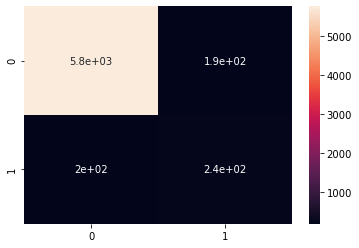

In [79]:
sns.heatmap(cm, annot=True)

In [83]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5950
           1       0.56      0.55      0.56       443

    accuracy                           0.94      6393
   macro avg       0.77      0.76      0.76      6393
weighted avg       0.94      0.94      0.94      6393

